#TASK #1: UNDERSTAND THE PROBLEM STATEMENT & BUSINESS CASE

![alt text](https://drive.google.com/uc?id=1U3eRNUYyza1A7EFopacJyujR87Vm_ae8)


![alt text](https://drive.google.com/uc?id=139zlnLGzYen-GbcnkXQZs44tf7OqV8e4)

#TASK #2: IMPORT DATASETS AND LIBRARIES


In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [4]:
# Read stock prices data
stocks = ["AAPL", "MSFT","AMZN","TSLA","SPY","WMT","IBM","GOOG"]

data = yf.download(stocks, start = "2012-01-01", end = "2022-12-06")

[*********************100%***********************]  8 of 8 completed


In [5]:
data

Adj Close                                                 \
                  AAPL       AMZN        GOOG         IBM        MSFT   
Date                                                                    
2012-01-03   12.519276   8.951500   16.573130  118.534370   21.466696   
2012-01-04   12.586557   8.875500   16.644611  118.050812   21.971888   
2012-01-05   12.726293   8.880500   16.413727  117.490906   22.196423   
2012-01-06   12.859333   9.130500   16.189817  116.142036   22.541243   
2012-01-09   12.838936   8.928000   15.503389  115.537605   22.244534   
...                ...        ...         ...         ...         ...   
2022-11-29  141.169998  92.419998   95.440002  146.490005  240.330002   
2022-11-30  148.029999  96.540001  101.449997  148.899994  255.139999   
2022-12-01  148.309998  95.500000  101.279999  149.160004  254.690002   
2022-12-02  147.809998  94.129997  100.830002  148.669998  255.020004   
2022-12-05  146.630005  91.010002   99.870003  147.410004  250.199997   

                                                     Close             ...  \
                   SPY        TSLA         WMT        AAPL       AMZN  ...   
Date                                                                   ...   
2012-01-03  104.071907    1.872000   47.333115   14.686786   8.951500  ...   
2012-01-04  104.235153    1.847333   46.846672   14.765714   8.875500  ...   
2012-01-05  104.512665    1.808000   46.619144   14.929643   8.880500  ...   
2012-01-06  104.243309    1.794000   46.289627   15.085714   9.130500  ...   
2012-01-09  104.496353    1.816667   46.430859   15.061786   8.928000  ...   
...                ...         ...         ...         ...        ...  ...   
2022-11-29  395.230011  180.830002  152.970001  141.169998  92.419998  ...   
2022-11-30  407.679993  194.699997  152.419998  148.029999  96.540001  ...   
2022-12-01  407.380005  194.699997  153.369995  148.309998  95.500000  ...   
2022-12-02  406.910004  194.860001  153.220001  147.809998  94.129997  ...   
2022-12-05  399.589996  182.449997  151.649994  146.630005  91.010002  ...   

                  Open                 Volume                                 \
                  TSLA         WMT       AAPL       AMZN       GOOG      IBM   
Date                                                                           
2012-01-03    1.929333   59.970001  302220800  102216000  147611217  5905716   
2012-01-04    1.880667   60.209999  260022000   84104000  114989399  4546648   
2012-01-05    1.850667   59.349998  271269600   76182000  131808205  4668403   
2012-01-06    1.813333   59.419998  318292800  140168000  108119746  5122367   
2012-01-09    1.800000   59.029999  394024400  101138000  233776981  5440455   
...                ...         ...        ...        ...        ...      ...   
2022-11-29  184.990005  153.029999   83763800   65567300   20220000  2754700   
2022-11-30  182.429993  152.610001  111224400  102628200   39888100  6376500   
2022-12-01  197.080002  152.050003   71250400   68488000   21771500  4495900   
2022-12-02  191.779999  151.479996   65421400   72427000   18812200  2899700   
2022-12-05  189.440002  152.750000   68826400   71535500   19955500  2784600   

                                                      
                MSFT        SPY       TSLA       WMT  
Date                                                  
2012-01-03  64731500  193697900   13921500  12668800  
2012-01-04  80516100  127186500    9451500   9593300  
2012-01-05  56081400  173895000   15082500  12768200  
2012-01-06  99455500  148050000   14794500   8069400  
2012-01-09  59706800   99530200   13455000   6679300  
...              ...        ...        ...       ...  
2022-11-29  17956300   52310000   83357100   4613900  
2022-11-30  47553800  144566700  109186400  10442600  
2022-12-01  26041500   76398200   80046200   7577400  
2022-12-02  21522800   85273900   73533400   6910600  
2022-12-05  23435300   77289800   93122700   7869400  

[2750

In [6]:
stock_price_df = data.loc[:,"Close"].copy()
stock_price_df.reset_index(inplace = True)

In [7]:
stock_price_df= stock_price_df.sort_values(by = ['Date'])
stock_price_df

Date        AAPL       AMZN        GOOG         IBM        MSFT  \
0    2012-01-03   14.686786   8.951500   16.573130  178.107071   26.770000   
1    2012-01-04   14.765714   8.875500   16.644611  177.380493   27.400000   
2    2012-01-05   14.929643   8.880500   16.413727  176.539200   27.680000   
3    2012-01-06   15.085714   9.130500   16.189817  174.512421   28.110001   
4    2012-01-09   15.061786   8.928000   15.503389  173.604202   27.740000   
...         ...         ...        ...         ...         ...         ...   
2745 2022-11-29  141.169998  92.419998   95.440002  146.490005  240.330002   
2746 2022-11-30  148.029999  96.540001  101.449997  148.899994  255.139999   
2747 2022-12-01  148.309998  95.500000  101.279999  149.160004  254.690002   
2748 2022-12-02  147.809998  94.129997  100.830002  148.669998  255.020004   
2749 2022-12-05  146.630005  91.010002   99.870003  147.410004  250.199997   

             SPY        TSLA         WMT  
0     127.500000    1.872000   60.330002  
1     127.699997    1.847333   59.709999  
2     128.039993    1.808000   59.419998  
3     127.709999    1.794000   59.000000  
4     128.020004    1.816667   59.180000  
...          ...         ...         ...  
2745  395.230011  180.830002  152.970001  
2746  407.679993  194.699997  152.419998  
2747  407.380005  194.699997  153.369995  
2748  406.910004  194.860001  153.220001  
2749  399.589996  182.449997  151.649994  

[2750 rows x 9 columns]

In [8]:
# Read the stocks volume data
stock_vol_df = data.loc[:,"Volume"].copy()
stock_vol_df.reset_index(inplace = True)
stock_vol_df = stock_vol_df.sort_values( by = ['Date'])


In [9]:
stock_vol_df

Date       AAPL       AMZN       GOOG      IBM      MSFT  \
0    2012-01-03  302220800  102216000  147611217  5905716  64731500   
1    2012-01-04  260022000   84104000  114989399  4546648  80516100   
2    2012-01-05  271269600   76182000  131808205  4668403  56081400   
3    2012-01-06  318292800  140168000  108119746  5122367  99455500   
4    2012-01-09  394024400  101138000  233776981  5440455  59706800   
...         ...        ...        ...        ...      ...       ...   
2745 2022-11-29   83763800   65567300   20220000  2754700  17956300   
2746 2022-11-30  111224400  102628200   39888100  6376500  47553800   
2747 2022-12-01   71250400   68488000   21771500  4495900  26041500   
2748 2022-12-02   65421400   72427000   18812200  2899700  21522800   
2749 2022-12-05   68826400   71535500   19955500  2784600  23435300   

            SPY       TSLA       WMT  
0     193697900   13921500  12668800  
1     127186500    9451500   9593300  
2     173895000   15082500  12768200  
3     148050000   14794500   8069400  
4      99530200   13455000   6679300  
...         ...        ...       ...  
2745   52310000   83357100   4613900  
2746  144566700  109186400  10442600  
2747   76398200   80046200   7577400  
2748   85273900   73533400   6910600  
2749   77289800   93122700   7869400  

[2750 rows x 9 columns]

In [10]:
# Check if Null values exist in stock prices data
stock_price_df.isnull().sum()

Date    0
AAPL    0
AMZN    0
GOOG    0
IBM     0
MSFT    0
SPY     0
TSLA    0
WMT     0
dtype: int64

In [11]:
# Check if Null values exist in stocks volume data
stock_vol_df.isnull().sum()

Date    0
AAPL    0
AMZN    0
GOOG    0
IBM     0
MSFT    0
SPY     0
TSLA    0
WMT     0
dtype: int64

In [12]:
# Get stock prices dataframe info
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 2749
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2750 non-null   datetime64[ns]
 1   AAPL    2750 non-null   float64       
 2   AMZN    2750 non-null   float64       
 3   GOOG    2750 non-null   float64       
 4   IBM     2750 non-null   float64       
 5   MSFT    2750 non-null   float64       
 6   SPY     2750 non-null   float64       
 7   TSLA    2750 non-null   float64       
 8   WMT     2750 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 214.8 KB


In [13]:
# Get stock volume dataframe info
stock_vol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 2749
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2750 non-null   datetime64[ns]
 1   AAPL    2750 non-null   int64         
 2   AMZN    2750 non-null   int64         
 3   GOOG    2750 non-null   int64         
 4   IBM     2750 non-null   int64         
 5   MSFT    2750 non-null   int64         
 6   SPY     2750 non-null   int64         
 7   TSLA    2750 non-null   int64         
 8   WMT     2750 non-null   int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 214.8 KB


**MINI CHALLENGE #1:**
- **What is the average trading volume for Apple stock?**
- **What is the maximum trading volume for sp500?**
- **Which security is traded the most? comment on your answer**
- **What is the average stock price of the SPY over the specified time period?**
- **What is the maximum price of Tesla Stock?**


In [14]:
stock_vol_df.describe()

AAPL          AMZN          GOOG           IBM          MSFT  \
count  2.750000e+03  2.750000e+03  2.750000e+03  2.750000e+03  2.750000e+03   
mean   2.043503e+08  8.063501e+07  4.561215e+07  4.798341e+06  3.369753e+07   
std    1.720417e+08  4.310447e+07  3.609946e+07  2.755918e+06  1.748329e+07   
min    3.519590e+07  1.762600e+07  1.584340e+05  1.247878e+06  7.425600e+06   
25%    9.563100e+07  5.372200e+07  2.504050e+07  3.337472e+06  2.288070e+07   
50%    1.403920e+08  6.909700e+07  3.299450e+07  4.113604e+06  2.958005e+07   
75%    2.494127e+08  9.348650e+07  5.351250e+07  5.349638e+06  3.918595e+07   
max    1.506120e+09  4.771220e+08  4.995615e+08  3.981442e+07  2.484285e+08   

                SPY          TSLA           WMT  
count  2.750000e+03  2.750000e+03  2.750000e+03  
mean   1.009718e+08  1.033353e+08  8.277449e+06  
std    4.937756e+07  8.178310e+07  4.630083e+06  
min    2.027000e+07  5.473500e+06  2.094900e+06  
25%    6.595080e+07  5.538788e+07  5.793825e+06  
50%    8.933345e+07  8.337780e+07  7.099200e+06  
75%    1.237316e+08  1.241602e+08  9.379200e+06  
max    5.072443e+08  9.140820e+08  8.089810e+07

In [15]:
stock_price_df.describe()

AAPL         AMZN         GOOG          IBM         MSFT  \
count  2750.000000  2750.000000  2750.000000  2750.000000  2750.000000   
mean     58.129323    67.987607    55.168733   149.186547   112.652695   
std      47.726605    54.071797    35.765798    24.598194    89.339108   
min      13.947500     8.796500    13.924059    90.602295    26.370001   
25%      24.117232    17.910001    27.379330   131.368622    42.930000   
50%      37.382500    48.260250    46.378500   143.389099    70.180000   
75%      74.584377    98.969625    68.052126   170.817394   168.062504   
max     182.009995   186.570496   150.709000   206.309753   343.109985   

               SPY         TSLA          WMT  
count  2750.000000  2750.000000  2750.000000  
mean    260.861978    66.163864    95.256953  
std      91.300328    99.458037    28.327844  
min     127.500000     1.519333    56.419998  
25%     195.022499    13.487333    73.132498  
50%     242.290001    17.339000    82.655003  
75%     311.259987    46.862666   119.457499  
max     477.709991   409.970001   159.869995


- Average trading volume for Apple stock is 2.043503e+08	
- Average trading volume for SPY is 1.009718e+08
- AAPL has been the most trading security
- The average stock price of the SPY over the specified time period is 260.861978
- Max price for Tesla is 409.970001




#TASK #3: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [16]:
# Function to normalize stock prices based on their initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [17]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [18]:
# plot interactive chart for stocks data
interactive_plot(stock_price_df, 'Stock Prices')

In [19]:
#Plot the volume dataset for all stocks
interactive_plot(stock_vol_df, 'Stock Volume')

In [20]:
interactive_plot(normalize(stock_price_df),'Normalize Prices')

In [21]:
#Plot the normalized stock prices and volume dataset

In [22]:
interactive_plot(normalize(stock_vol_df),'Normalize Volume Data')

# TASK #4: PREPARE THE DATA BEFORE TRAINING THE AI/ML MODEL

![alt text](https://drive.google.com/uc?id=1uXYYHfgeJyncu4BZRAooTC4iCclH9e9B)

In [23]:
# Function to concatenate the date, stock price, and volume in one dataframe
def individual_stock(price_df, vol_df, name):
  return pd.DataFrame({ 'Date': price_df['Date'], 'Close': price_df[name], 'Volume': vol_df[name]})

In [24]:
# Function to return the input/output (target) data for AI/ML Model
# Note that our goal is to predict the future stock price 
# Target stock price today will be tomorrow's price 
def trading_window(data):
  n =1
  data['Target'] = data[['Close']].shift(-n)
  return data

In [25]:
# Let's test the functions and get individual stock prices and volumes for AAPL
price_volume_df = individual_stock(stock_price_df, stock_vol_df,'AAPL')
price_volume_df

Date       Close     Volume
0    2012-01-03   14.686786  302220800
1    2012-01-04   14.765714  260022000
2    2012-01-05   14.929643  271269600
3    2012-01-06   15.085714  318292800
4    2012-01-09   15.061786  394024400
...         ...         ...        ...
2745 2022-11-29  141.169998   83763800
2746 2022-11-30  148.029999  111224400
2747 2022-12-01  148.309998   71250400
2748 2022-12-02  147.809998   65421400
2749 2022-12-05  146.630005   68826400

[2750 rows x 3 columns]

In [26]:
price_volume_target_df = trading_window(price_volume_df)
price_volume_target_df

Date       Close     Volume      Target
0    2012-01-03   14.686786  302220800   14.765714
1    2012-01-04   14.765714  260022000   14.929643
2    2012-01-05   14.929643  271269600   15.085714
3    2012-01-06   15.085714  318292800   15.061786
4    2012-01-09   15.061786  394024400   15.115714
...         ...         ...        ...         ...
2745 2022-11-29  141.169998   83763800  148.029999
2746 2022-11-30  148.029999  111224400  148.309998
2747 2022-12-01  148.309998   71250400  147.809998
2748 2022-12-02  147.809998   65421400  146.630005
2749 2022-12-05  146.630005   68826400         NaN

[2750 rows x 4 columns]

In [27]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

Date       Close     Volume      Target
0    2012-01-03   14.686786  302220800   14.765714
1    2012-01-04   14.765714  260022000   14.929643
2    2012-01-05   14.929643  271269600   15.085714
3    2012-01-06   15.085714  318292800   15.061786
4    2012-01-09   15.061786  394024400   15.115714
...         ...         ...        ...         ...
2744 2022-11-28  144.220001   69246000  141.169998
2745 2022-11-29  141.169998   83763800  148.029999
2746 2022-11-30  148.029999  111224400  148.309998
2747 2022-12-01  148.309998   71250400  147.809998
2748 2022-12-02  147.809998   65421400  146.630005

[2749 rows x 4 columns]

In [28]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0,1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date'])) 

In [29]:
price_volume_target_scaled_df

array([[0.00439887, 0.18153547, 0.00486851],
       [0.00486851, 0.15284684, 0.00584391],
       [0.00584391, 0.16049346, 0.00677256],
       ...,
       [0.79781333, 0.05168758, 0.79947937],
       [0.79947937, 0.02451146, 0.79650429],
       [0.79650429, 0.02054865, 0.78948313]])

In [30]:
# Create Feature and Target
X = price_volume_target_scaled_df[:, :2] 
y = price_volume_target_scaled_df[:, 2:]

In [31]:
X

array([[0.00439887, 0.18153547],
       [0.00486851, 0.15284684],
       [0.00584391, 0.16049346],
       ...,
       [0.79781333, 0.05168758],
       [0.79947937, 0.02451146],
       [0.79650429, 0.02054865]])

In [32]:
y

array([[0.00486851],
       [0.00584391],
       [0.00677256],
       ...,
       [0.79947937],
       [0.79650429],
       [0.78948313]])

In [33]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
X.shape

(2749, 2)

In [34]:
y.shape

(2749, 1)

In [35]:
split= int(0.65*len(X))
split

1786

In [36]:
X_train = X[:split]
X_train.shape

(1786, 2)

In [37]:
y_train = y[:split]
y_train

array([[0.00486851],
       [0.00584391],
       [0.00677256],
       ...,
       [0.17619934],
       [0.17129045],
       [0.17050206]])

In [38]:
X_test = X[split: ]
y_test = y[split:]

In [39]:
X_test.shape

(963, 2)

In [40]:
y_test.shape

(963, 1)

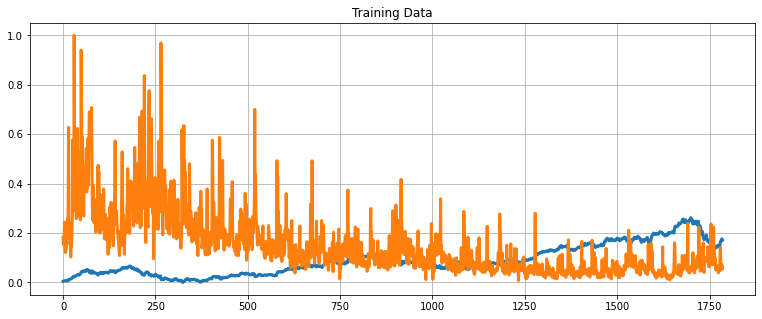

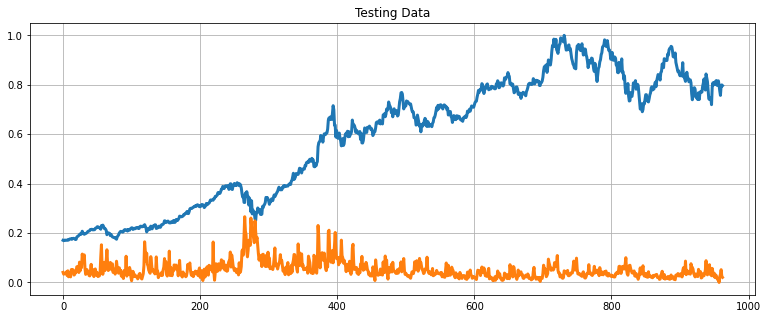

In [41]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13,5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, "Training Data")
show_plot(X_test, "Testing Data")



**MINI CHALLENGE #3:**
- **Test the created pipeline with SPY and Amazon datasets**

In [42]:
price_volume_spy = individual_stock(stock_price_df, stock_vol_df,'SPY')
price_volume_spy

Date       Close     Volume
0    2012-01-03  127.500000  193697900
1    2012-01-04  127.699997  127186500
2    2012-01-05  128.039993  173895000
3    2012-01-06  127.709999  148050000
4    2012-01-09  128.020004   99530200
...         ...         ...        ...
2745 2022-11-29  395.230011   52310000
2746 2022-11-30  407.679993  144566700
2747 2022-12-01  407.380005   76398200
2748 2022-12-02  406.910004   85273900
2749 2022-12-05  399.589996   77289800

[2750 rows x 3 columns]

In [43]:
price_volume_target_spy = trading_window(price_volume_spy)
price_volume_target_spy

Date       Close     Volume      Target
0    2012-01-03  127.500000  193697900  127.699997
1    2012-01-04  127.699997  127186500  128.039993
2    2012-01-05  128.039993  173895000  127.709999
3    2012-01-06  127.709999  148050000  128.020004
4    2012-01-09  128.020004   99530200  129.130005
...         ...         ...        ...         ...
2745 2022-11-29  395.230011   52310000  407.679993
2746 2022-11-30  407.679993  144566700  407.380005
2747 2022-12-01  407.380005   76398200  406.910004
2748 2022-12-02  406.910004   85273900  399.589996
2749 2022-12-05  399.589996   77289800         NaN

[2750 rows x 4 columns]

In [44]:
price_volume_target_spy = price_volume_target_spy[:-1]
price_volume_target_spy

Date       Close     Volume      Target
0    2012-01-03  127.500000  193697900  127.699997
1    2012-01-04  127.699997  127186500  128.039993
2    2012-01-05  128.039993  173895000  127.709999
3    2012-01-06  127.709999  148050000  128.020004
4    2012-01-09  128.020004   99530200  129.130005
...         ...         ...        ...         ...
2744 2022-11-28  395.910004   67881600  395.230011
2745 2022-11-29  395.230011   52310000  407.679993
2746 2022-11-30  407.679993  144566700  407.380005
2747 2022-12-01  407.380005   76398200  406.910004
2748 2022-12-02  406.910004   85273900  399.589996

[2749 rows x 4 columns]

In [45]:
sc = MinMaxScaler(feature_range= (0,1))
price_volume_target_scaled_spy= sc.fit_transform(price_volume_target_spy.drop(columns = ['Date'])) 

In [46]:
X_spy = price_volume_target_scaled_spy[:, :2] 
y_spy = price_volume_target_scaled_spy[:, 2:]

In [47]:
X_train_spy = X_spy[:split]

In [48]:
y_train_spy = y_spy[:split]
y_train_spy

array([[0.00000000e+00],
       [9.71390369e-04],
       [2.85767161e-05],
       ...,
       [4.14388148e-01],
       [4.06959858e-01],
       [4.07902650e-01]])

In [49]:
X_test_spy = X_spy[split: ]
y_test_spy = y_spy[split:]

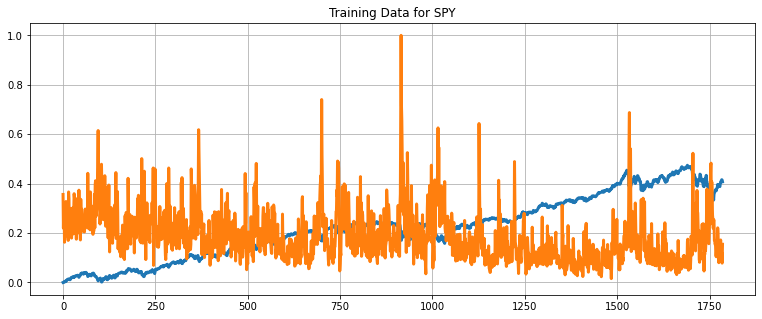

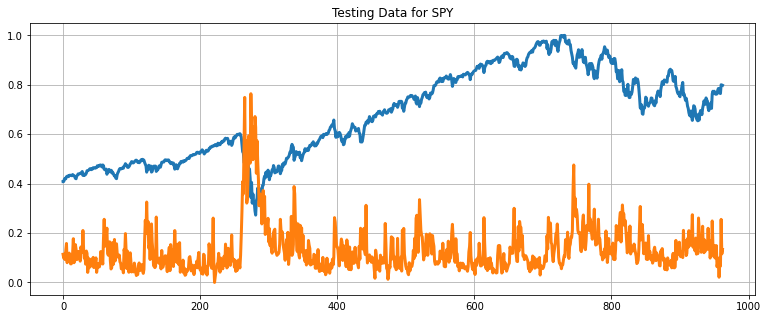

In [50]:
show_plot(X_train_spy, "Training Data for SPY")
show_plot(X_test_spy, "Testing Data for SPY")

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND REGRESSION 

![alt text](https://drive.google.com/uc?id=1wJHaXRzsqMi713Qkzo2IQgZTmsDxU8f7)

![alt text](https://drive.google.com/uc?id=1vDuV9M1b6KF5yIvWpiUqhI7zSr7CKk5g)

![alt text](https://drive.google.com/uc?id=1H-wED3vnYj3ZpsvK0dOEPwYGVjSVhpfI)

![alt text](https://drive.google.com/uc?id=1KM0yvHp1DjVZ87uf68yJdqj2Sh_oTLLT)

# TASK #6: UNDERSTAND THE CONCEPT OF REGULARIZATION & RIDGE REGRESSION

![alt text](https://drive.google.com/uc?id=1m9NX1aEDLAW2QCqeiQMYggnY3ovVW8QO)

![alt text](https://drive.google.com/uc?id=13Wn7UkxVkbRlIiJ-rZIrqAItfumj_wzi)

![alt text](https://drive.google.com/uc?id=1WB1wdMUYqDNAhCytmk889w9SVQQVrwlt)

![alt text](https://drive.google.com/uc?id=1IsQLtMZbKMyITX_FVr50ZkB68uUuQwmB)

![alt text](https://drive.google.com/uc?id=1D37GCrEMLdFwjTQL9WIoPEsLlEyITuX5)

![alt text](https://drive.google.com/uc?id=1IBz73HFZPUD6wTEoerXGFTJKhhZyAyb9)

# TASK #7: BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [51]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()
regression_model.fit(X_train, y_train)

Ridge()

In [52]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print(f'Rifge Regression Score {lr_accuracy}')

Rifge Regression Score 0.8563588563532932


In [53]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.01806352],
       [0.01971113],
       [0.02017797],
       ...,
       [0.67690572],
       [0.67947172],
       [0.67719683]])

In [54]:
# Append the predicted values into a list
predicted = []
for i in predicted_prices:
  predicted.append(i[0])
  

In [55]:
len(predicted)

2749

In [56]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])


In [57]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

Date
0    2012-01-03
1    2012-01-04
2    2012-01-05
3    2012-01-06
4    2012-01-09
...         ...
2744 2022-11-28
2745 2022-11-29
2746 2022-11-30
2747 2022-12-01
2748 2022-12-02

[2749 rows x 1 columns]

In [58]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

Date     Close
0    2012-01-03  0.004399
1    2012-01-04  0.004869
2    2012-01-05  0.005844
3    2012-01-06  0.006773
4    2012-01-09  0.006630
...         ...       ...
2744 2022-11-28  0.775143
2745 2022-11-29  0.756995
2746 2022-11-30  0.797813
2747 2022-12-01  0.799479
2748 2022-12-02  0.796504

[2749 rows x 2 columns]

In [59]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = predicted
df_predicted

Date     Close  Prediction
0    2012-01-03  0.004399    0.018064
1    2012-01-04  0.004869    0.019711
2    2012-01-05  0.005844    0.020178
3    2012-01-06  0.006773    0.019537
4    2012-01-09  0.006630    0.017157
...         ...       ...         ...
2744 2022-11-28  0.775143    0.659498
2745 2022-11-29  0.756995    0.644125
2746 2022-11-30  0.797813    0.676906
2747 2022-12-01  0.799479    0.679472
2748 2022-12-02  0.796504    0.677197

[2749 rows x 3 columns]

In [60]:
# Plot the results
interactive_plot(df_predicted, 'Original vs Prediction')

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND NEURAL NETWORKS

![alt text](https://drive.google.com/uc?id=1U2auh7KSalF4qc8iWFScawEB3TniFeXw)

![alt text](https://drive.google.com/uc?id=1xsy74Dj9JyuvwcPzmQcwN9hzHGevAvKB)

![alt text](https://drive.google.com/uc?id=1b2wIRl63jXgyoh_w1ysxk3XvTJ5j8864)

# TASK #9: UNDERSTAND HOW DO ARTFICIAL NEURAL NETWORKS TRAIN 

![alt text](https://drive.google.com/uc?id=1pg1rxBoHDtRNVNN0TyMvnCMVKw9ni5pN)

![alt text](https://drive.google.com/uc?id=1wc4NOBLC55Hb2s8s_hLI2LWykV4WmLwU)

![alt text](https://drive.google.com/uc?id=1zI3MbDUAws-gpPisqDrVL8BoupWRO6KJ)

![alt text](https://drive.google.com/uc?id=1twCXUdFtdFMGsicoQOWI0a9RiHMZ9MK_)

# TASK #10: UNDERSTAND THE THEORY AND INTUITION BEHIND RECURRENT NEURAL NETWORKS

![alt text](https://drive.google.com/uc?id=1a6w38XX_W2Zcsvde5FDepUax1aRyvnBT)

![alt text](https://drive.google.com/uc?id=1tc1SRSaFp-zuvujAQY66E_JEoY6doI0m)

![alt text](https://drive.google.com/uc?id=10xmgZjv2IjaY4xFm81rwgKqOC0119tug)

![alt text](https://drive.google.com/uc?id=1CwBOagYD82QaayeGDndRjb_Irm5HIwBs)

![alt text](https://drive.google.com/uc?id=148mslyqerZ_gLzQIkPFiDsewCO5nMNK7)

# TASK #11: UNDERSTAND THE THEORY AND INTUITION BEHIND LONG SHORT TERM MEMORY NETWORKS

![alt text](https://drive.google.com/uc?id=1cd3jZpTuSzsPjMps6SRFqvXNfs4jA_vu)

![alt text](https://drive.google.com/uc?id=1URS5Ny54g-c3ookAL1FLn28TYFlbDIdG)

![alt text](https://drive.google.com/uc?id=1Cm3Unnn_b71rfklW_ejm50xYOYkXh8cl)

![alt text](https://drive.google.com/uc?id=1pU8lbF965n38ZspjIFsEAU3CEjpclpfd)

![alt text](https://drive.google.com/uc?id=1zSqTnPZDfiz6qRgMHaFB9wpB55Fnzwf4)

# TASK #12: TRAIN AN LSTM TIME SERIES MODEL

In [61]:
# Let's test the functions and get individual stock prices and volumes for AAPL
price_volume_df

Date       Close     Volume      Target
0    2012-01-03   14.686786  302220800   14.765714
1    2012-01-04   14.765714  260022000   14.929643
2    2012-01-05   14.929643  271269600   15.085714
3    2012-01-06   15.085714  318292800   15.061786
4    2012-01-09   15.061786  394024400   15.115714
...         ...         ...        ...         ...
2745 2022-11-29  141.169998   83763800  148.029999
2746 2022-11-30  148.029999  111224400  148.309998
2747 2022-12-01  148.309998   71250400  147.809998
2748 2022-12-02  147.809998   65421400  146.630005
2749 2022-12-05  146.630005   68826400         NaN

[2750 rows x 4 columns]

In [62]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:,1:3].values
training_data

array([[1.46867857e+01, 3.02220800e+08],
       [1.47657137e+01, 2.60022000e+08],
       [1.49296427e+01, 2.71269600e+08],
       ...,
       [1.48309998e+02, 7.12504000e+07],
       [1.47809998e+02, 6.54214000e+07],
       [1.46630005e+02, 6.88264000e+07]])

In [63]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0,1))
training_set_scaled = sc.fit_transform(training_data)

In [64]:
from tensorflow.python import train
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
  X.append(training_set_scaled[i-1:i, 0])
  y.append(training_set_scaled[i,0])

In [65]:
X

[array([0.00439887]),
 array([0.00486851]),
 array([0.00584391]),
 array([0.00677256]),
 array([0.00663019]),
 array([0.00695107]),
 array([0.00680444]),
 array([0.00655793]),
 array([0.00622217]),
 array([0.00726133]),
 array([0.00819848]),
 array([0.00790947]),
 array([0.0063263]),
 array([0.00783722]),
 array([0.00634968]),
 array([0.01192796]),
 array([0.01149658]),
 array([0.01205972]),
 array([0.01327737]),
 array([0.01401476]),
 array([0.01395314]),
 array([0.01372576]),
 array([0.01469479]),
 array([0.01560643]),
 array([0.01663922]),
 array([0.01830739]),
 array([0.02181161]),
 array([0.02186474]),
 array([0.02381555]),
 array([0.02527333]),
 array([0.0227679]),
 array([0.02373267]),
 array([0.02371354]),
 array([0.02641875]),
 array([0.02603411]),
 array([0.026746]),
 array([0.02802528]),
 array([0.02873719]),
 array([0.03078787]),
 array([0.03228178]),
 array([0.03271317]),
 array([0.03286405]),
 array([0.03030973]),
 array([0.02969346]),
 array([0.02978484]),
 array([0.0321

In [66]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [67]:
# Split the data
split = int(0.7*len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [68]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
X_train.shape, X_test.shape

((1924, 1, 1), (825, 1, 1))

In [84]:
from tensorflow.python.training import optimizer
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm_3 (LSTM)               (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_5 (LSTM)               (None, 150)               180600    
                                                                 
 dense_1 (Dense)             (None, 1)                 151 

In [85]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
49/49 [==============================] - 8s 46ms/step - loss: 0.0024 - val_loss: 0.0148
Epoch 2/20
49/49 [==============================] - 1s 14ms/step - loss: 8.2962e-04 - val_loss: 5.2201e-04
Epoch 3/20
49/49 [==============================] - 1s 15ms/step - loss: 4.8285e-05 - val_loss: 2.6532e-05
Epoch 4/20
49/49 [==============================] - 1s 15ms/step - loss: 2.8501e-05 - val_loss: 2.8067e-05
Epoch 5/20
49/49 [==============================] - 1s 14ms/step - loss: 2.5935e-05 - val_loss: 4.3564e-05
Epoch 6/20
49/49 [==============================] - 1s 15ms/step - loss: 2.4084e-05 - val_loss: 2.6027e-05
Epoch 7/20
49/49 [==============================] - 1s 15ms/step - loss: 2.2298e-05 - val_loss: 2.6802e-05
Epoch 8/20
49/49 [==============================] - 1s 15ms/step - loss: 2.4112e-05 - val_loss: 2.5711e-05
Epoch 9/20
49/49 [==============================] - 1s 15ms/step - loss: 2.1948e-05 - val_loss: 3.2144e-05
Epoch 10/20
49/49 [==========================

In [89]:
# Make prediction
predicted = model.predict(X)

86/86 [==============================] - 0s 5ms/step


In [91]:
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [92]:
test_predicted

[0.0051039075,
 0.0055804076,
 0.0065700863,
 0.007512373,
 0.0073679015,
 0.0076935007,
 0.0075447126,
 0.0072945855,
 0.0069538937,
 0.008008318,
 0.008959275,
 0.008666009,
 0.0070595457,
 0.008592689,
 0.007083273,
 0.012743999,
 0.0123062,
 0.012877716,
 0.014113522,
 0.014861933,
 0.014799386,
 0.014568611,
 0.015552132,
 0.016477443,
 0.01752575,
 0.019219063,
 0.022776395,
 0.02283033,
 0.024810877,
 0.026290964,
 0.023747236,
 0.02472673,
 0.024707314,
 0.027453942,
 0.0270634,
 0.027786218,
 0.029085187,
 0.029808054,
 0.03189043,
 0.03340749,
 0.03384558,
 0.03399881,
 0.03140489,
 0.03077909,
 0.030871883,
 0.03331039,
 0.033996657,
 0.035470657,
 0.038945444,
 0.043581855,
 0.042714104,
 0.042716265,
 0.04606863,
 0.047117777,
 0.046370845,
 0.0456887,
 0.04497849,
 0.04733796,
 0.04895708,
 0.049634963,
 0.0479597,
 0.04573404,
 0.049853012,
 0.05216092,
 0.051079273,
 0.05310225,
 0.053652804,
 0.051970933,
 0.051487323,
 0.050746795,
 0.04696018,
 0.041542035,
 0.047925

In [93]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

Date
1    2012-01-04
2    2012-01-05
3    2012-01-06
4    2012-01-09
5    2012-01-10
...         ...
2745 2022-11-29
2746 2022-11-30
2747 2022-12-01
2748 2022-12-02
2749 2022-12-05

[2749 rows x 1 columns]

In [94]:
df_predicted['predictions'] = test_predicted

In [95]:
df_predicted

Date  predictions
1    2012-01-04     0.005104
2    2012-01-05     0.005580
3    2012-01-06     0.006570
4    2012-01-09     0.007512
5    2012-01-10     0.007368
...         ...          ...
2745 2022-11-29     0.769876
2746 2022-11-30     0.752866
2747 2022-12-01     0.791018
2748 2022-12-02     0.792567
2749 2022-12-05     0.789801

[2749 rows x 2 columns]

In [96]:
close = []
for i in training_set_scaled:
  close.append(i[0])

In [97]:
close

[0.004398872408929569,
 0.004868507196354996,
 0.005843912127121903,
 0.006772564671363626,
 0.006630185240570616,
 0.006951068109028763,
 0.006804438461278914,
 0.0065579315523044135,
 0.006222170087236356,
 0.007261328272355802,
 0.008198481250511203,
 0.007909472171968343,
 0.006326297565417846,
 0.007837218483702127,
 0.00634967659594142,
 0.011927958675044065,
 0.011496575840230158,
 0.012059715400705967,
 0.013277371348968586,
 0.014014764130152693,
 0.013953138821539562,
 0.013725760726131797,
 0.014694787494202485,
 0.01560643349609489,
 0.016639219193040067,
 0.018307392464205305,
 0.021811614064547846,
 0.0218647389392473,
 0.02381554880078114,
 0.025273333495322015,
 0.022767895856269982,
 0.023732666732861854,
 0.023713543593817082,
 0.026418747104362372,
 0.02603410530702971,
 0.02674599678647281,
 0.028025283717870525,
 0.028737186546357568,
 0.030787867994594084,
 0.03228177669600708,
 0.03271316520534295,
 0.03286405074457162,
 0.03030973277325498,
 0.029693456989035763

In [98]:
df_predicted['Close'] = close[1:]

In [99]:
df_predicted

Date  predictions     Close
1    2012-01-04     0.005104  0.004869
2    2012-01-05     0.005580  0.005844
3    2012-01-06     0.006570  0.006773
4    2012-01-09     0.007512  0.006630
5    2012-01-10     0.007368  0.006951
...         ...          ...       ...
2745 2022-11-29     0.769876  0.756995
2746 2022-11-30     0.752866  0.797813
2747 2022-12-01     0.791018  0.799479
2748 2022-12-02     0.792567  0.796504
2749 2022-12-05     0.789801  0.789483

[2749 rows x 3 columns]

In [100]:
interactive_plot(df_predicted, "Original Prices vs LSTM prediction")